In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.nn import functional as F
from torch import nn

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [5]:
data['Species']=pd.factorize(data.Species)[0]

In [6]:
data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [7]:
X=torch.from_numpy(data.iloc[:,1:-1].values).type(torch.float32)
Y=torch.from_numpy(data.Species.values).type(torch.LongTensor)

In [8]:
Y.shape

torch.Size([150])

In [9]:
train_x,text_x,train_y,text_y=train_test_split(X,Y)


In [10]:
train_ds=TensorDataset(train_x,train_y)
train_dl=DataLoader(train_ds,batch_size=8,shuffle=True)
text_ds=TensorDataset(text_x,text_y)
text_dl=DataLoader(text_ds,batch_size=8)

# 创建模型

In [11]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()             #继承之前的初始化
        self.linear_1=nn.Linear(4,32)  #因为数据集比较小，所以中间层可以少一点
        self.linear_2=nn.Linear(32,32)
        self.linear_3=nn.Linear(32,3)  #是个三分类问题，所以最后输出撒个概率
    def forward(self,input):
        x=F.relu(self.linear_1(input))
        x=F.relu(self.linear_2(x))
        x=self.linear_3(x)             #因为是多分类，用的损失函数CrossEntropyLoss
                                       #的输入是未激活的输出
        return x

In [12]:
loss_fn=nn.CrossEntropyLoss()   #使用这个损失函数来计算多分类问题的损失

In [13]:
model=Model()

In [14]:
input_batch,label_batch=next(iter(train_dl))  #iter是生成器，next返回批次的张量
                         #next可以将乱序切片后的数据拆分出X和Y,next需要iter类型的数据，所以先转换成iter

In [15]:
next(iter(train_dl))

[tensor([[5.8000, 2.7000, 5.1000, 1.9000],
         [4.8000, 3.0000, 1.4000, 0.3000],
         [6.4000, 2.8000, 5.6000, 2.1000],
         [6.4000, 2.9000, 4.3000, 1.3000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [5.0000, 3.5000, 1.3000, 0.3000],
         [6.5000, 3.2000, 5.1000, 2.0000],
         [5.5000, 4.2000, 1.4000, 0.2000]]),
 tensor([2, 0, 2, 1, 0, 0, 2, 0])]

In [16]:
train_x,train_y

(tensor([[6.7000, 3.1000, 5.6000, 2.4000],
         [5.8000, 2.7000, 5.1000, 1.9000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [6.4000, 2.8000, 5.6000, 2.2000],
         [6.3000, 2.5000, 4.9000, 1.5000],
         [7.0000, 3.2000, 4.7000, 1.4000],
         [5.8000, 2.8000, 5.1000, 2.4000],
         [5.9000, 3.2000, 4.8000, 1.8000],
         [5.1000, 3.4000, 1.5000, 0.2000],
         [6.0000, 2.7000, 5.1000, 1.6000],
         [5.1000, 3.8000, 1.9000, 0.4000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [5.8000, 2.7000, 3.9000, 1.2000],
         [4.8000, 3.4000, 1.9000, 0.2000],
         [6.1000, 2.9000, 4.7000, 1.4000],
         [5.6000, 3.0000, 4.5000, 1.5000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [6.7000, 3.3000, 5.7000, 2.1000],
         [5.0000, 3.5000, 1.6000, 0.6000],
         [5.7000, 2.5000, 5.0000, 2.0000],
         [6.1000, 2.8000, 4.0000, 1.3000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [6.9000, 3.1000, 5.4000, 2.1000],
         [5

In [17]:
input_batch.shape,label_batch.shape  #上面设置的切片个数是8，所以8个一批次
                                     #4个输入特征，一个输出

(torch.Size([8, 4]), torch.Size([8]))

In [18]:
y_pred=model(input_batch)

In [19]:
y_pred.shape 
        #8个输入的预测结果都变成了一个长度为3的张量，哪个的取值最大结果就应该是那个

torch.Size([8, 3])

In [20]:
y_pred

tensor([[ 0.3066, -0.0122,  0.2778],
        [ 0.5124,  0.0178,  0.7007],
        [ 0.4608, -0.1014,  0.5913],
        [ 0.5008, -0.0814,  0.6320],
        [ 0.4417, -0.0876,  0.5833],
        [ 0.4156, -0.1243,  0.5364],
        [ 0.5079, -0.0555,  0.6616],
        [ 0.4387, -0.0729,  0.5778]], grad_fn=<AddmmBackward>)

In [21]:
torch.argmax(y_pred,dim=1)   #选出预测值3维中最大的那个维度的值

tensor([0, 2, 2, 2, 2, 2, 2, 2])

# 创建训练函数

In [22]:
def accuracy(y_pred,y_true):        #正确率计算函数
    y_pred=torch.argmax(y_pred,dim=1)
    acc=(y_pred==y_true).float().mean()
    return acc

In [23]:
train_loss=[] #创建几个空的列表来存放数据,方便绘图，看看模型怎么样
train_acc=[]
text_loss=[]
text_acc=[]

In [24]:
optim=torch.optim.Adam(model.parameters(),lr=0.001)

In [25]:
for epoch in range(20):
    for x,y in train_dl:
        y_pred=model(x)
        loss=loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
    with torch.no_grad():
        epoch_accuracy=accuracy(model(train_x),train_y)  
        epoch_loss=loss_fn(model(train_x),train_y).data
        epoch_text_accuracy=accuracy(model(text_x),text_y)  
        epoch_text_loss=loss_fn(model(text_x),text_y).data
        print('epoch: ',epoch,'loss: ',round(epoch_loss.item(),3),
                              'accuracy: ',round(epoch_accuracy.item(),3),
                              'text_loss: ',round(epoch_text_loss.item(),3),
                              'text_accuracy: ',round(epoch_text_accuracy.item(),3))
        train_loss.append(epoch_loss)
        train_acc.append(epoch_accuracy)
        text_loss.append(epoch_text_loss)
        text_acc.append(epoch_text_accuracy)

epoch:  0 loss:  1.024 accuracy:  0.652 text_loss:  1.02 text_accuracy:  0.658
epoch:  1 loss:  0.971 accuracy:  0.688 text_loss:  0.973 text_accuracy:  0.711
epoch:  2 loss:  0.913 accuracy:  0.705 text_loss:  0.916 text_accuracy:  0.711
epoch:  3 loss:  0.848 accuracy:  0.67 text_loss:  0.852 text_accuracy:  0.684
epoch:  4 loss:  0.778 accuracy:  0.857 text_loss:  0.787 text_accuracy:  0.842
epoch:  5 loss:  0.701 accuracy:  0.795 text_loss:  0.708 text_accuracy:  0.789
epoch:  6 loss:  0.627 accuracy:  0.875 text_loss:  0.639 text_accuracy:  0.868
epoch:  7 loss:  0.567 accuracy:  0.777 text_loss:  0.573 text_accuracy:  0.789
epoch:  8 loss:  0.511 accuracy:  0.929 text_loss:  0.525 text_accuracy:  0.947
epoch:  9 loss:  0.464 accuracy:  0.92 text_loss:  0.478 text_accuracy:  0.947
epoch:  10 loss:  0.424 accuracy:  0.946 text_loss:  0.44 text_accuracy:  0.947
epoch:  11 loss:  0.391 accuracy:  0.955 text_loss:  0.409 text_accuracy:  1.0
epoch:  12 loss:  0.364 accuracy:  0.946 tex

Text(0, 0.5, 'loss')

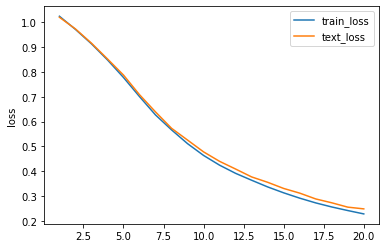

In [26]:
plt.plot(range(1,21),train_loss,label='train_loss')
plt.plot(range(1,21),text_loss,label='text_loss')
plt.legend()
plt.ylabel('loss')

Text(0, 0.5, 'acc')

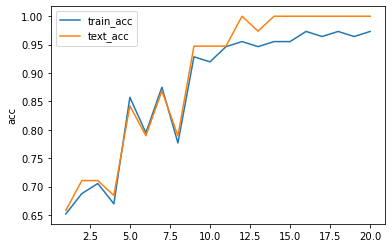

In [27]:
plt.plot(range(1,21),train_acc,label='train_acc')
plt.plot(range(1,21),text_acc,label='text_acc')
plt.legend()
plt.ylabel('acc')

# 创建fit函数

编写一个fit函数，以后训练的时候都可以直接调用，fit的参数为输入模型和输入数据
（train_dl,text_dl），对输入数据再模型上做一个训练并且返回loss和acc变化

In [28]:
def fit(epoch,model,trainloader,textloader):   #因为这个函数没有输入train_x和train_y所以直接用train_dl和text_dl来算正确率
    correct=0                            #通过记录预测正确的个数和样本总数之间的比值来看正确率
    total=0                              #总样本的个数
    running_loss=0
    for x,y in trainloader:    
        y_pred=model(x)
        loss=loss_fn(y_pred,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
        with torch.no_grad():                  #每一个y值进行一次计算，这是对训练数据
            y_pred=torch.argmax(y_pred,dim=1)
            correct+=(y_pred==y).sum().item()  #每一次正确的个数加到correct里
            total+=y.size(0)                   #每一批样本的个数
            running_loss+=loss.item()          #每一批样本的loss
        
        epoch_acc=correct/total                #正确率为正确个数除以样本个数
        epoch_loss=running_loss/len(trainloader.dataset)  #平均loss为一个批次的总loss除以训练的长度
        
        
        text_correct=0                          #这是对测试数据 ,对于测试数据不用反向传播不用优化
        text_total=0                              
        text_running_loss=0
        with torch.no_grad():                  
             for x,y in textloader:    
                y_pred=model(x)
                loss=loss_fn(y_pred,y)
                y_pred=torch.argmax(y_pred,dim=1)
                text_correct+=(y_pred==y).sum().item() 
                text_total+=y.size(0)                   
                text_running_loss+=loss.item()
        
        epoch_text_acc=text_correct/text_total                
        epoch_text_loss=running_loss/len(textloader.dataset)  
        
        print('epoch: ',epoch,'loss: ',round(epoch_loss,3),
                              'accuracy: ',round(epoch_acc,3),
                              'text_loss: ',round(epoch_text_loss,3),
                              'text_accuracy: ',round(epoch_text_acc,3))
        return epoch_loss,epoch_acc,epoch_text_loss,epoch_text_acc  
                                                    #这样就会将每个epoch上的这些平均正确率和平均损失返回

In [29]:
Y.size(),Y.size(0)

(torch.Size([150]), 150)

In [30]:
X.size(),X.size(0),X.size(1)

(torch.Size([150, 4]), 150, 4)

In [31]:
train_dl.dataset

In [32]:
len(train_dl.dataset)

112

# 调用fit函数

In [33]:
model=Model()
optim=torch.optim.Adam(model.parameters(),lr=0.001)

In [34]:
epochs=20

In [35]:
train_loss=[] #如果想把值保存下来就创建这四个列表
train_acc=[]
text_loss=[]
text_acc=[]

In [36]:
for epoch in range(epochs):
    epoch_loss,epoch_acc,epoch_text_loss,epoch_text_acc =fit(epoch,model,train_dl,text_dl)
    
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    text_loss.append(epoch_text_loss)
    text_acc.append(epoch_text_acc)

epoch:  0 loss:  0.011 accuracy:  0.25 text_loss:  0.033 text_accuracy:  0.368
epoch:  1 loss:  0.01 accuracy:  0.25 text_loss:  0.03 text_accuracy:  0.368
epoch:  2 loss:  0.01 accuracy:  0.25 text_loss:  0.03 text_accuracy:  0.368
epoch:  3 loss:  0.01 accuracy:  0.25 text_loss:  0.03 text_accuracy:  0.368
epoch:  4 loss:  0.009 accuracy:  0.5 text_loss:  0.026 text_accuracy:  0.368
epoch:  5 loss:  0.009 accuracy:  0.5 text_loss:  0.028 text_accuracy:  0.368
epoch:  6 loss:  0.009 accuracy:  0.375 text_loss:  0.028 text_accuracy:  0.368
epoch:  7 loss:  0.009 accuracy:  0.375 text_loss:  0.028 text_accuracy:  0.368
epoch:  8 loss:  0.01 accuracy:  0.125 text_loss:  0.03 text_accuracy:  0.368
epoch:  9 loss:  0.009 accuracy:  0.375 text_loss:  0.027 text_accuracy:  0.368
epoch:  10 loss:  0.009 accuracy:  0.5 text_loss:  0.026 text_accuracy:  0.368
epoch:  11 loss:  0.009 accuracy:  0.125 text_loss:  0.027 text_accuracy:  0.395
epoch:  12 loss:  0.009 accuracy:  0.5 text_loss:  0.027

Text(0, 0.5, 'loss')

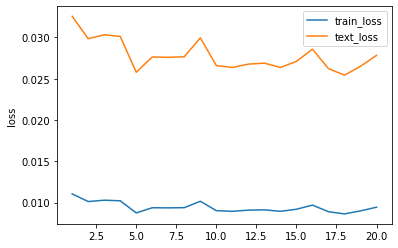

In [37]:
plt.plot(range(1,21),train_loss,label='train_loss')
plt.plot(range(1,21),text_loss,label='text_loss')
plt.legend()
plt.ylabel('loss')

Text(0, 0.5, 'acc')

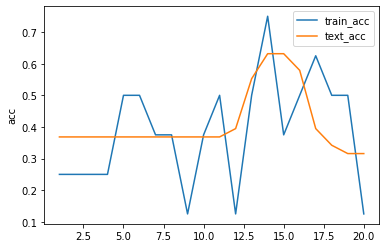

In [38]:
plt.plot(range(1,21),train_acc,label='train_acc')
plt.plot(range(1,21),text_acc,label='text_acc')
plt.legend()
plt.ylabel('acc')